In [2]:
import numpy as np
import scipy as sp
import distances
import gr_kmeans
import gr_lbg
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

1/11 - changed to use Gaussian normal distribution to generate random points

In [3]:
def generate_point_clouds(m,n, clusters = 2, cluster_size = 10, eps=[.1]):
    point_clouds = []
    labels = []
    sz = cluster_size*len(eps)-(len(eps)-1)
    for c in range(clusters):
        point_clouds.append(np.linalg.qr(np.random.random((m,n))*2-1)[0])
        labels.append(c)
        for e in eps:
            for i in range(cluster_size-1):
                point_clouds.append(np.linalg.qr(point_clouds[c*sz]+e*np.random.randn(m,n))[0])
                labels.append(c)
    return point_clouds, labels
    

Testing point clouds on Grassmannians generated using several epsilon values:

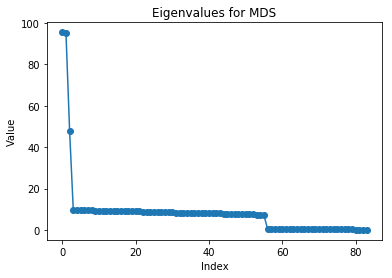

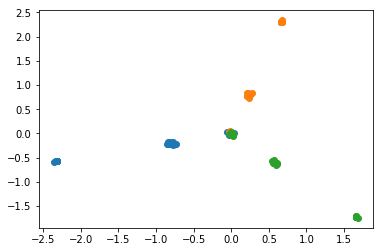

In [3]:
data, labels = generate_point_clouds(200,20,clusters=3, eps=[.01, .1, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Starting with Gr(20,200). Each ball ends up with three distinct clusters, one for each epsilon value. Below shows the balls generated using only $\epsilon = 0.1$

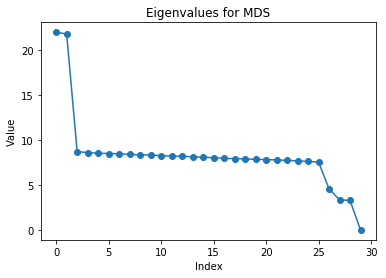

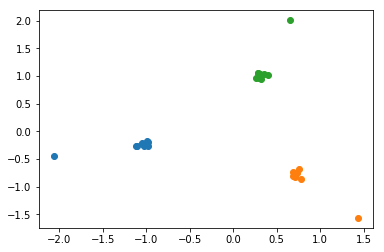

In [4]:
data, labels = generate_point_clouds(200,20,clusters=3, eps=[.1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

The center point used to generate each cluster sits alone farthest from the center. The separation of the center point from the cluster varies with epsilon, with $\epsilon = 0.01$ points nearly indistiguishable from the center in MDS embeddings, and $\epsilon = 1$ points clustered together in the center (as seen in original figure).

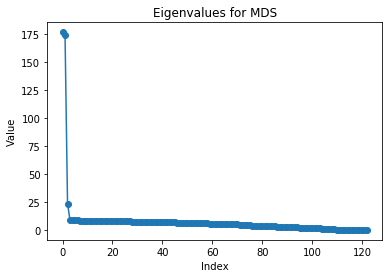

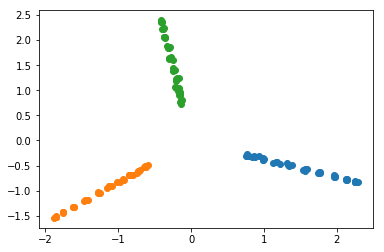

In [5]:
data, labels = generate_point_clouds(200,20,clusters=3, cluster_size = 5, eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Above clusters generated using a sequence of epsilon values from $\epsilon =0.01$ to $0.1$ Again, the "centers" for each clusster are farthest from the center of the embedded figure.

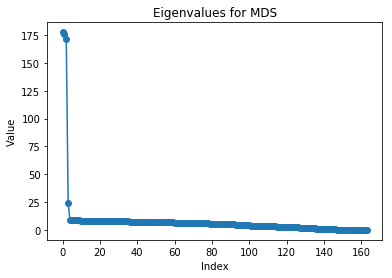

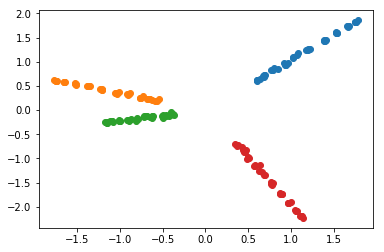

In [6]:
data, labels = generate_point_clouds(200,20,clusters=4, cluster_size = 5, eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Same as previous, but with 4 clusters

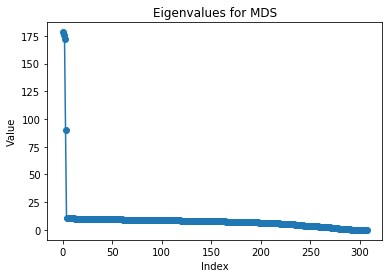

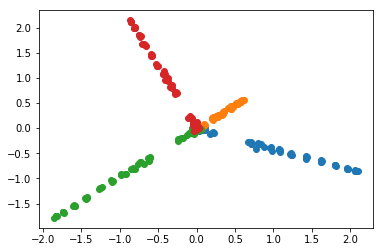

In [7]:
data, labels = generate_point_clouds(200,20,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Extending the $\epsilon$ values all the way to $1$ yields clusters that overlap at their outer edges - which embeds as the center of the figure.

LBG terminated after 4 iterations 



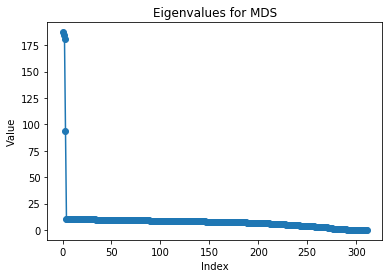

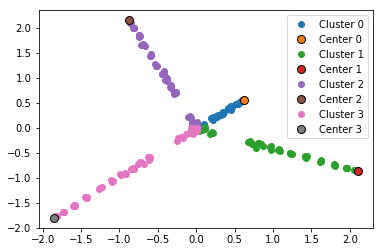

In [8]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=4, plot_results = True, eigplot=True)

Grassmann LBG run on the data from the previous figure. The points used to generate each cluster are correctly identified. Clusters are separated correctly everywhere but the area where they overlap.

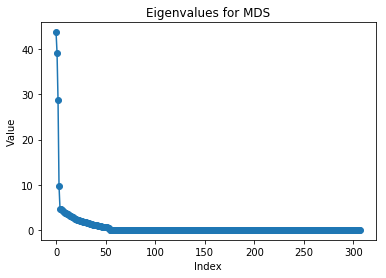

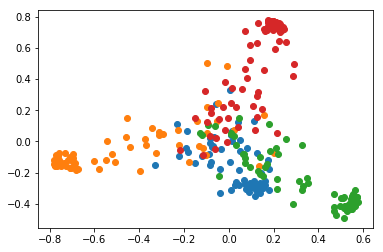

In [4]:
data, labels = generate_point_clouds(10,2,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

The same test done on four clusters in a lower dimensional Grassmannian, Gr(2,10). Same sort of pattern but with more spread. Orange and red points are split more in the third dimension making the overall shape a tetrahedron.

Iteration 1 cluster distortion: 181.04477046
Iteration 2 cluster distortion: 163.06588669
Iteration 3 cluster distortion: 162.90421671
Iteration 4 cluster distortion: 162.90421671
LBG terminated after 4 iterations 

Final cluster distortion: 162.9042


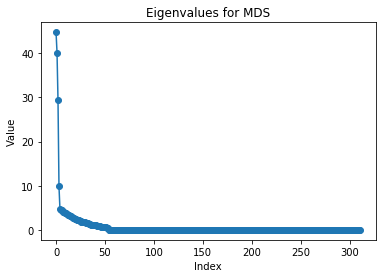

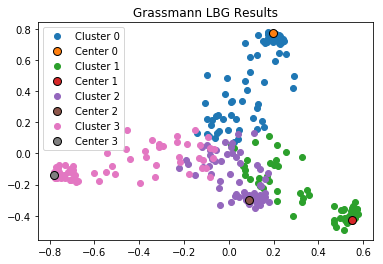

([array([[-0.04426393,  0.5341745 ],
         [ 0.14867484,  0.27018921],
         [-0.42471244,  0.07977745],
         [-0.06277701, -0.41721104],
         [-0.61287749,  0.06905354],
         [-0.18431769, -0.06207221],
         [ 0.00525427,  0.40818218],
         [-0.04469844,  0.41910339],
         [ 0.36715736, -0.22471098],
         [-0.49516965, -0.24464091]]), array([[-0.35364687,  0.19538734],
         [-0.21561634,  0.38959608],
         [-0.53903135,  0.22543862],
         [-0.18242172, -0.29393417],
         [-0.13385087,  0.19750455],
         [ 0.29736354,  0.45539718],
         [-0.10155145, -0.36659335],
         [ 0.27250814,  0.46099046],
         [ 0.25483719,  0.19645669],
         [ 0.49875294, -0.2023019 ]]), array([[-0.00609215,  0.6503866 ],
         [-0.01374912,  0.47029675],
         [-0.07963915, -0.1672311 ],
         [ 0.34662778,  0.0655101 ],
         [-0.17525857,  0.13030297],
         [-0.33734665,  0.34986099],
         [ 0.68307682,  0.14152233],
 

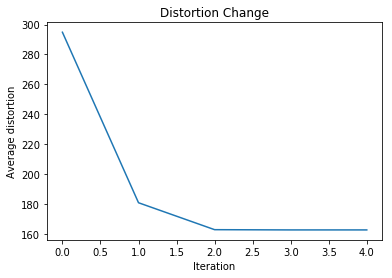

In [6]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=4, plot_results = True, eigplot=True, show_cluster_data=False)

LBG on the lower dimensional data set. Centers again selected near the "end" of each embedded point cloud, where the initial point used to generate them sits. Again, all points except those near the overlap region are correctly identified (close inspection shows that almost all red points are assigned to the green cluster, and almost all orange points assigned to the blue cluster).

Epoch 1 cluster distortion: 167.49849466
Epoch 2 cluster distortion: 164.96251025
Epoch 3 cluster distortion: 164.29383062
Epoch 4 cluster distortion: 164.04421121
Epoch 5 cluster distortion: 163.92457904
Epoch 6 cluster distortion: 163.85837817
Epoch 7 cluster distortion: 163.81277461
Epoch 8 cluster distortion: 163.78265155
Epoch 9 cluster distortion: 163.76287267
Epoch 10 cluster distortion: 163.74944797
Epoch 11 cluster distortion: 163.74011243
Epoch 12 cluster distortion: 163.73350749
Epoch 13 cluster distortion: 163.72878128
Epoch 14 cluster distortion: 163.72537975
Epoch 15 cluster distortion: 163.72293142
Epoch 16 cluster distortion: 163.72118066
Epoch 17 cluster distortion: 163.71994764
Epoch 18 cluster distortion: 163.71910338
Epoch 19 cluster distortion: 163.71855387
Epoch 20 cluster distortion: 163.71822954
Epoch 21 cluster distortion: 163.71807827
Epoch 22 cluster distortion: 163.71806055
Epoch 23 cluster distortion: 163.71814617
Kmeans terminated after 23 iterations 

Fin

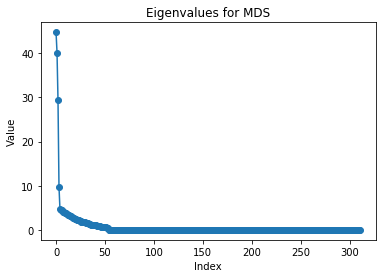

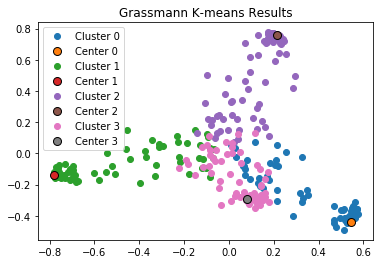

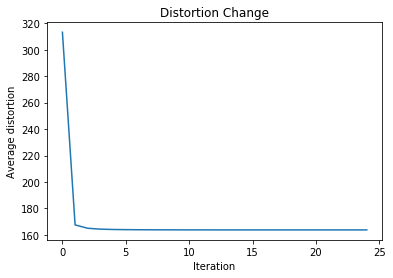

In [17]:
g = gr_kmeans.gr_kmeans()
c = g.fit(data, center_count=4, plot_results = True, eigplot=True, show_cluster_data=False, numits = 500)

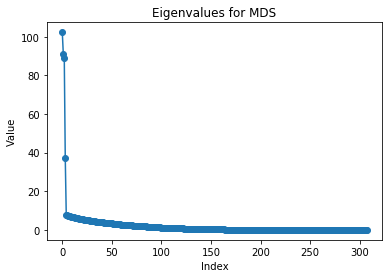

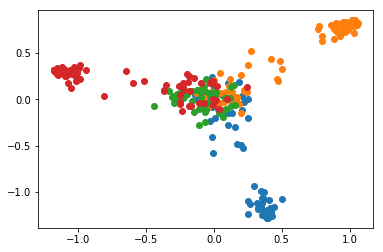

In [11]:
data, labels = generate_point_clouds(20,10,clusters=4, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

Same idea as above, but in Gr(10,20)

LBG terminated after 5 iterations 



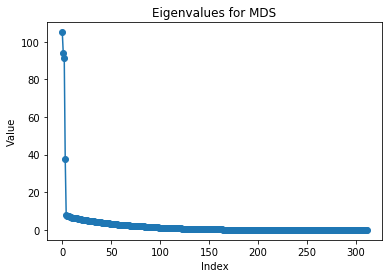

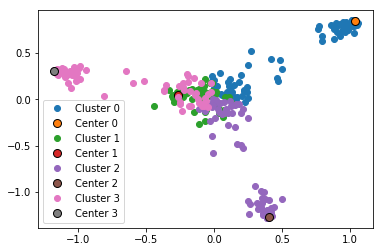

In [12]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=4, plot_results = True, eigplot=True)

Again centers are at the end of each cluster in the embedded image.

So when embedding points from a grassmannian, the center of a point cloud will show up at the edge, with the rest of the points scattering away in a parabolic shape. The thickness of the parabola depends on the dimension of the manifold. A cluster of points on a high dimensional Grassmannian will look close to linear in the embedding, with the center at the end of the line.

To be extra sure this is the case, I did a few more embeddings using only one cluster at a time and varying the dimension.  I anticipated that the same pattern would hold, with maybe a bit more spreading seen in the absence of extra clusters.

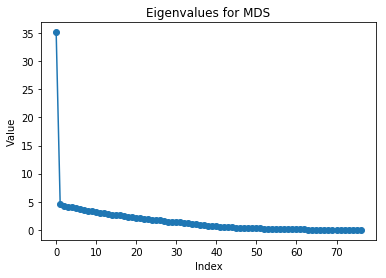

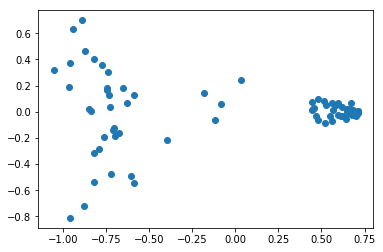

In [13]:
data, labels = generate_point_clouds(20,10,clusters=1, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

LBG terminated after 2 iterations 



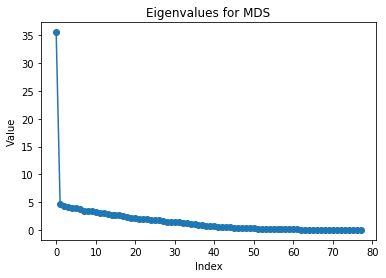

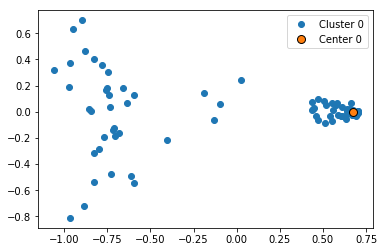

In [14]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=1, plot_results = True, eigplot=True)

One cluster in Gr(10,20). MDS eigenvalues indicate that the cluster is essentially one dimensional.

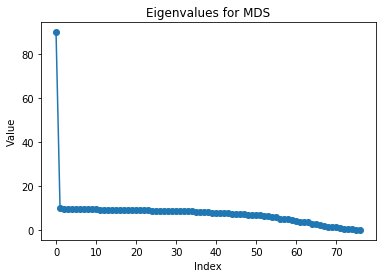

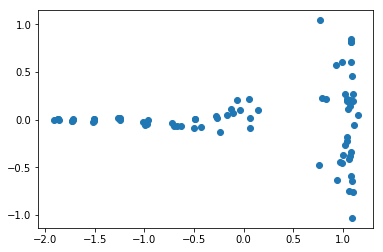

In [15]:
data, labels = generate_point_clouds(200,20,clusters=1, cluster_size = 5, 
                                     eps=[.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                                         .2, .3, .4, .5, .6, .7, .8, .9, 1])
D = distances.chordal_distance(data,data)
embed = distances.mds(D, eigplot=True)
plt.figure()
for i in np.unique(labels):
    idx = np.where(labels == i)[0]
    plt.plot(embed[idx,0], embed[idx,1], 'o')
plt.show()

LBG terminated after 2 iterations 



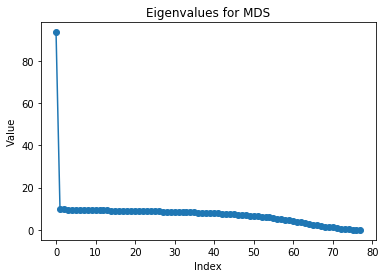

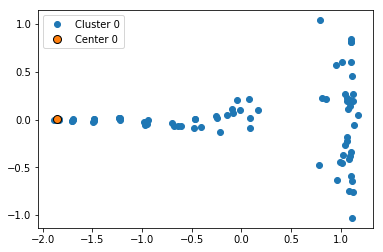

In [16]:
g = gr_lbg.gr_lbg()
g.fit(data, center_count=1, plot_results = True, eigplot=True)

One cluster in Gr(20,200). The embedding shows an odd triangular pattern, but the MDS eigenvalues indicate that the data is essentially one dimensional, and projecting onto the x axis would give the expected result. 

It is interesting to me that changing the epsilon value in these higher dimensional spaces has a much, much bigger impact on the embedding distances. In the previous Gr(1,3) case, even a large epsilon of $0.5$ made a well connected cluster, but in higher dimensions large epsilons give a bunch of points that cluster together away from the center.  I think about it like starting at the point of a needle and tracing two different paths down the side, and it doesn't take much for points on the two paths to be much closer to each other than to the starting point.